In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [268]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [269]:
df 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
#Dataset is havning 12 columns name Country', 'Region', 'Happiness Rank', 'Happiness Score','Standard Error', 'Economy (GDP per Capita)',
#'Family','Health (Life Expectancy)', 'Freedom', 'Trust','Generosity', 'Dystopia Residua
#As asked we need to predict happiness score.So considering happiness score as target varible and other all are features.


In [270]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [271]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
#count of all columns are complete 
#happiness rank is just index of there row will drop so not considering.
#standard error,trust,generosity, dystopia residual is having some issue in data distribution. 

In [273]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
#all datatype is floats as found 
#country and region is object
#happiness rank is integer

In [280]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
5     2
0     2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64


1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name

In [ ]:
#there is no null values as found
#happiness rank repeated twice at 82 will check is there is any dulplicate value or any country is sharing the same spot.

In [281]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
#sure that there is no null values

In [282]:
for i in df['Happiness Rank']:
    if 79 <= i <= 85:
        print(df.iloc[i])

Country                          Azerbaijan
Region                                    1
Happiness Rank                           80
Happiness Score                       5.212
Standard Error                      0.03363
Economy (GDP per Capita)            1.02389
Family                              0.93793
Health (Life Expectancy)            0.64045
Freedom                              0.3703
Trust (Government Corruption)       0.16065
Generosity                          0.07799
Dystopia Residual                   2.00073
Name: 79, dtype: object
Country                          Pakistan
Region                                  7
Happiness Rank                         81
Happiness Score                     5.194
Standard Error                    0.03726
Economy (GDP per Capita)          0.59543
Family                            0.41411
Health (Life Expectancy)          0.51466
Freedom                           0.12102
Trust (Government Corruption)     0.10464
Generosity                  

In [ ]:
#jordan and  Montenegro is sharing same rank
# Montenegro is repeting two times in data want to make sure is there value repeat.

In [283]:
df.head(84)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
79,Azerbaijan,1,80,5.212,0.03363,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799,2.00073
80,Pakistan,7,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
81,Jordan,4,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,1,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


In [284]:
# Montenegro is repeating once.
#processing further.

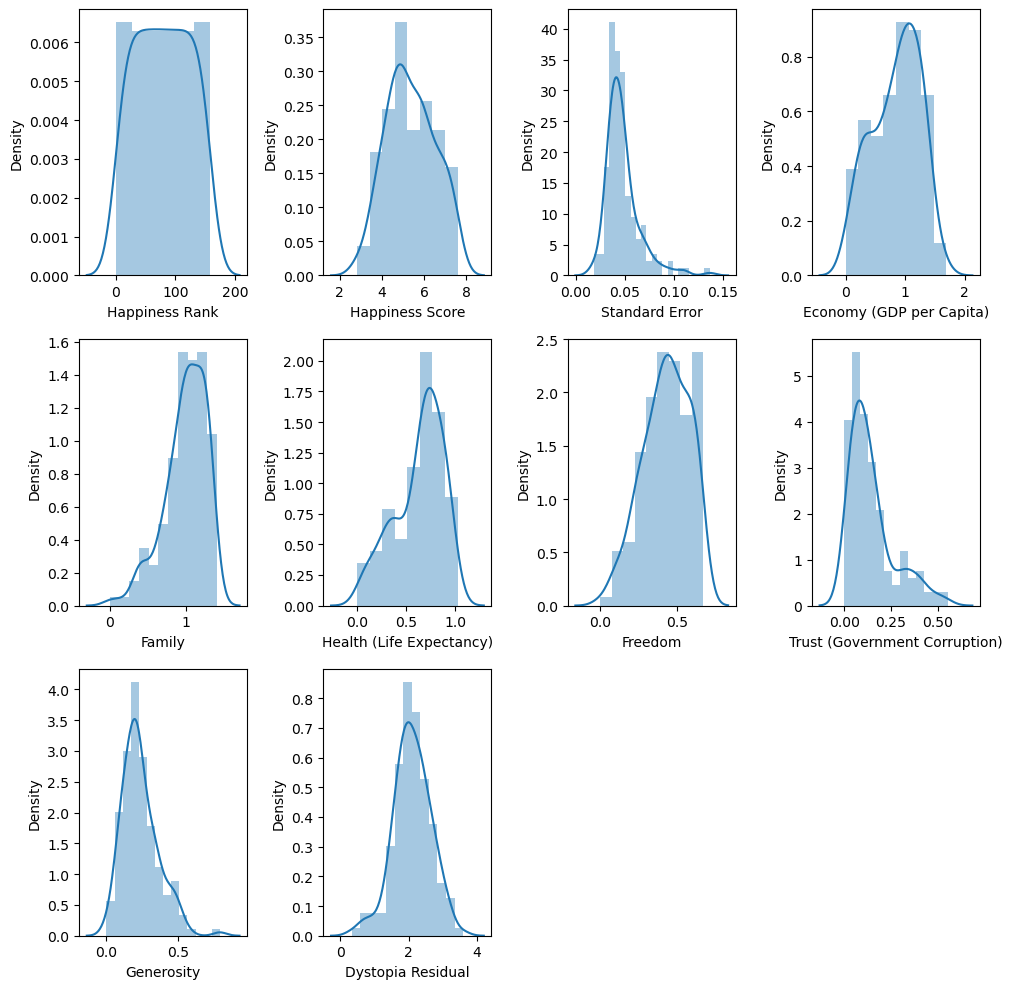

In [285]:
plt.figure(figsize=(10,10))
plotnumber=1
columns_to_plot=['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
for column in columns_to_plot:
    if plotnumber<=12:
           ax=plt.subplot(3,4,plotnumber)
           sns.distplot(df[column])
           plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#data distribution is mostly normal but standard error,Generosity,health trust is having some skewness/outliers.
#since its a data which represent country and their scores of various factor outliers can not be removed.It may delete some important 
#columns

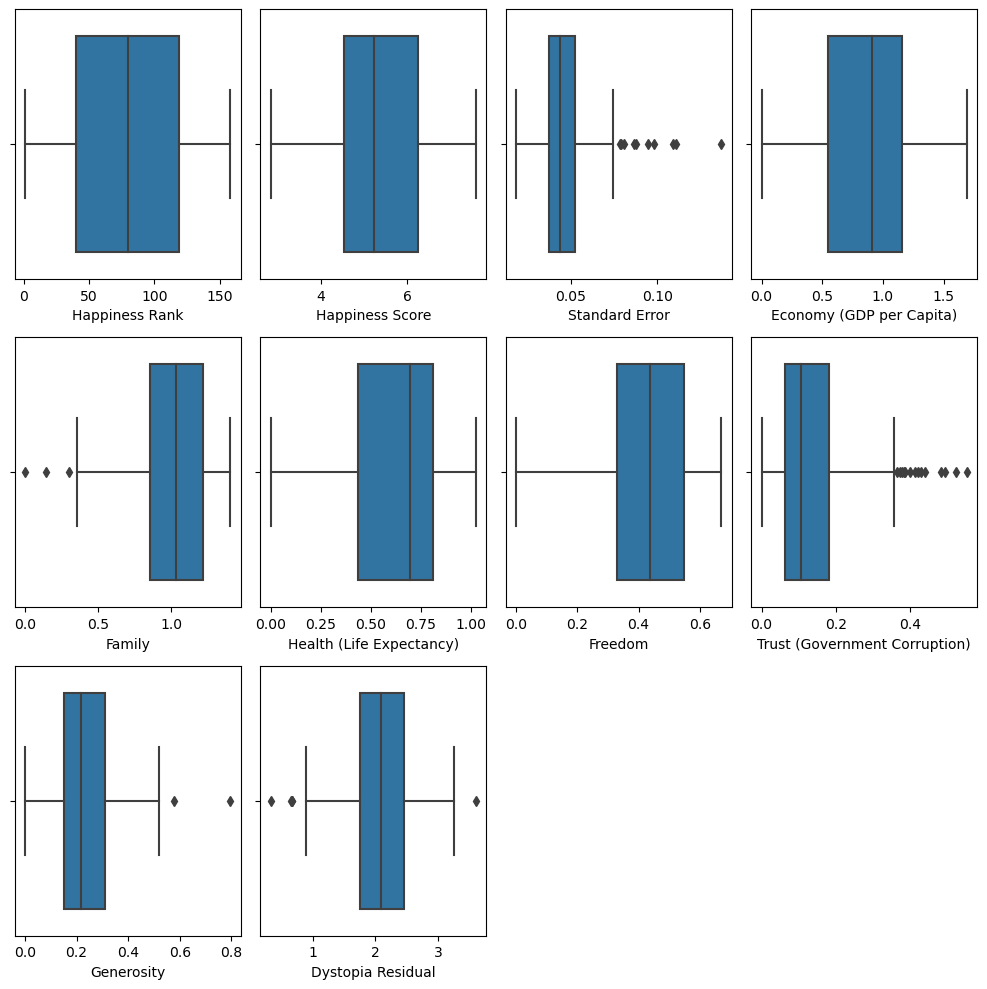

In [272]:
plt.figure(figsize=(10,10))
plotnumber=1
columns_to_plot=['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
for column in columns_to_plot:
    if plotnumber<=12:
           ax=plt.subplot(3,4,plotnumber)
           sns.boxplot(df[column])
           plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#using zscore we need all data in digits so encode first

In [274]:
from sklearn.preprocessing import LabelEncoder

In [275]:
end=LabelEncoder()

In [276]:
new=end.fit_transform(df['Region'])

In [277]:
new

array([9, 9, 9, 9, 5, 9, 9, 9, 0, 0, 4, 3, 9, 3, 5, 3, 9, 9, 9, 4, 9, 4,
       3, 6, 3, 9, 3, 4, 9, 3, 1, 3, 3, 6, 4, 9, 9, 2, 4, 3, 3, 3, 3, 1,
       1, 2, 2, 3, 4, 9, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 6, 1, 4, 1, 3, 9,
       9, 4, 1, 1, 8, 2, 1, 6, 6, 4, 1, 8, 7, 1, 7, 4, 1, 2, 8, 1, 1, 9,
       1, 6, 8, 4, 1, 8, 1, 1, 8, 3, 6, 2, 8, 9, 4, 1, 3, 1, 4, 4, 7, 4,
       1, 4, 8, 8, 8, 8, 7, 8, 3, 8, 7, 8, 8, 8, 8, 8, 1, 8, 6, 1, 8, 7,
       8, 1, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 7, 8,
       8, 4, 8, 8])

In [278]:
df['Region']=new

In [279]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [286]:
dtt=df.drop('Country',axis=1)

In [287]:
from scipy.stats import zscore
feature=dtt[['Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
z=np.abs(zscore(feature))
z

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.300256,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.300256,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.300256,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.040302,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.965117,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,0.965117,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.375441,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,0.965117,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [288]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))

In [289]:
df=dtt[(z<3).all(axis=1)]

df.shape

(149, 11)

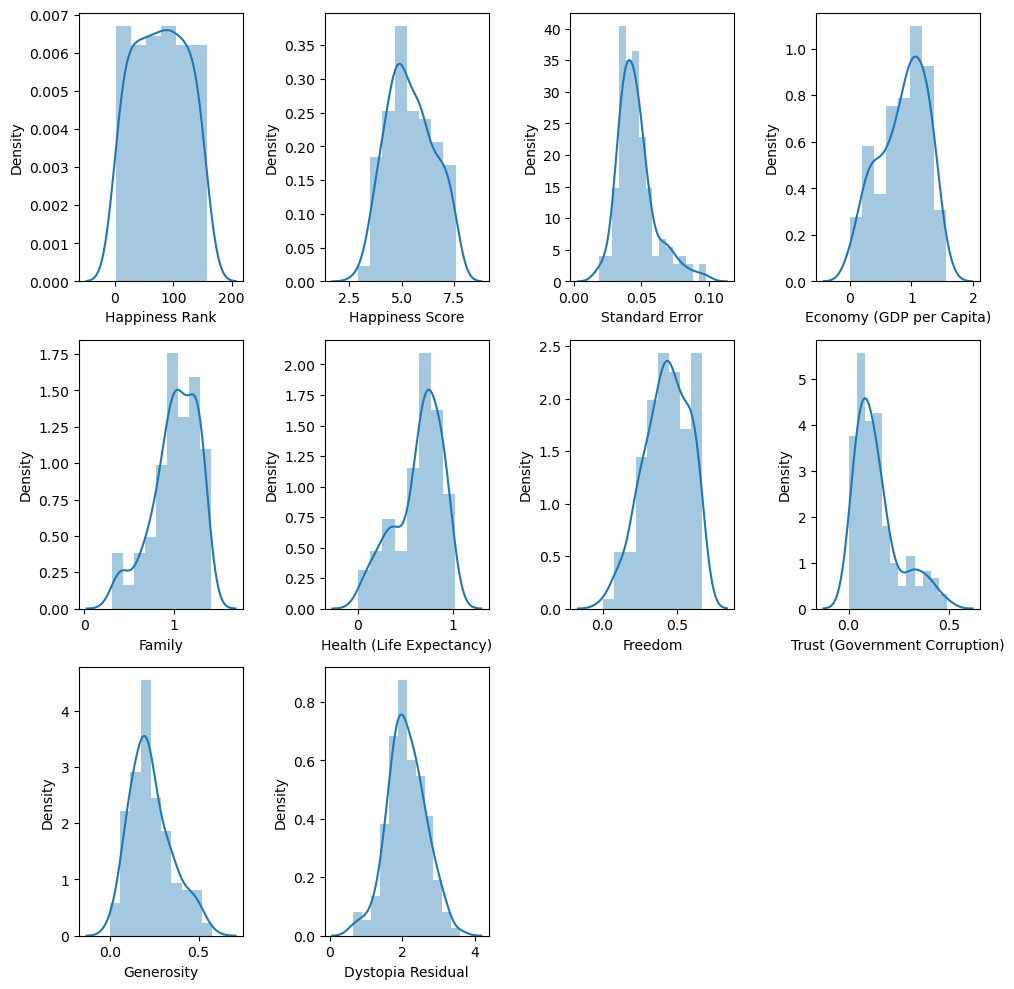

In [290]:
plt.figure(figsize=(10,10))
plotnumber=1
columns_to_plot=['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
for column in columns_to_plot:
    if plotnumber<=12:
           ax=plt.subplot(3,4,plotnumber)
           sns.distplot(df[column])
           plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#data distribution is found normal

In [291]:
df.skew()

Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [292]:
df['Trust (Government Corruption)'] =np.cbrt(df['Trust (Government Corruption)'])
df['Generosity'] =np.cbrt(df['Generosity'])
df['Standard Error']=np.cbrt(df['Standard Error'])

In [ ]:
#using cbrt to treat skewness

In [293]:
df.skew()

Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.087392
Dystopia Residual               -0.021144
dtype: float64

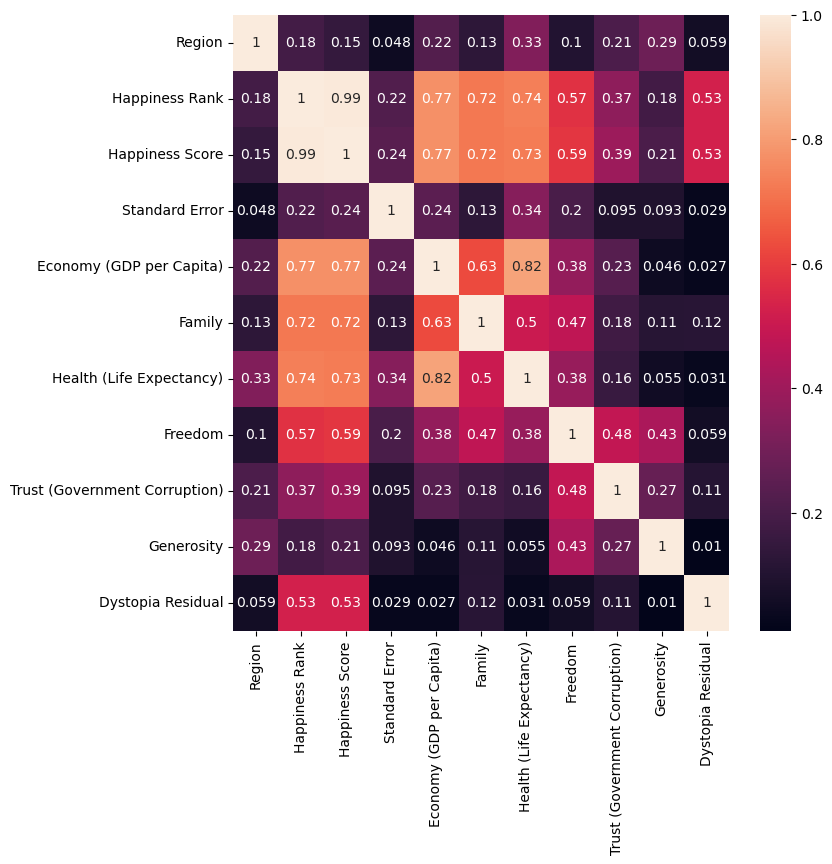

In [294]:
df_corr=df.corr().abs()

plt.figure(figsize=(8,8))
sns.heatmap(df_corr,annot=True)
plt.show()


In [ ]:
#economy, family and health is having high relationship with target
#health and economy having multi co-linearity

In [295]:
X=df.drop(['Happiness Score','Happiness Rank','Economy (GDP per Capita)'],axis=1)
y=df['Happiness Score']

In [ ]:
#dropping economy  happiness rank and happniess score

In [ ]:
y

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [297]:
Scale=StandardScaler()
scaled=Scale.fit_transform(X)

In [298]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=X.columns

In [299]:
vif

,vif,features
0,1.369011,Region
1,1.184324,Standard Error
2,1.570930,Family
3,1.823861,Health (Life Expectancy)
4,1.970086,Freedom
5,1.375530,Trust (Government Corruption)
6,1.329097,Generosity
7,1.033418,Dystopia Residual


In [ ]:
#vif score is under limit

In [300]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.25,random_state=155)

In [301]:
from sklearn.linear_model import LinearRegression

In [302]:
lin=LinearRegression()

In [303]:
lin.fit(x_train,y_train)

LinearRegression()

In [304]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def metric_score(lin, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = lin.predict(x_train)
        
        r2 = r2_score(y_train, y_pred)
        
        print("\n-------------Train Result---------\n")
        print(f"R-squared (R2) Score: {r2*100}%")
    else:
        y_pred = lin.predict(x_test)
        
        r2 = r2_score(y_test, y_pred)
        mse=mean_squared_error(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        print("\n----------Test Score--------")
        print(f'R-squared (R2) Score: {r2*100}%',)
        print(f'MSE:',mse)
        print(f'MAE:',mae)

In [305]:
metric_score(lin, x_train, x_test, y_train, y_test, train=True)
metric_score(lin, x_train, x_test, y_train, y_test, train=False)


-------------Train Result---------

R-squared (R2) Score: 95.94313947957339%

----------Test Score--------
R-squared (R2) Score: 98.09430029567928%
MSE: 0.029441090064955776
MAE: 0.13270962549442777


In [ ]:
#2nd model is randomfrostRegressor

In [306]:
from sklearn.ensemble import RandomForestRegressor

In [307]:
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=400,n_jobs=-1)


rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=400)

In [308]:
def metric_score(rf_regressor, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = rf_regressor.predict(x_train)
        
        r2 = r2_score(y_train, y_pred)
        
        print("\n-------------Train Result---------\n")
        print(f"R-squared (R2) Score: {r2*100}%")
    else:
        y_pred = rf_regressor.predict(x_test)
        
        r2 = r2_score(y_test, y_pred)
        mse=mean_squared_error(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        print("\n----------Test Score--------")
        print(f'R-squared (R2) Score: {r2*100}%',)
        print(f'MSE:',mse)
        print(f'MAE:',mae)
metric_score(rf_regressor, x_train, x_test, y_train, y_test, train=True)
metric_score(rf_regressor, x_train, x_test, y_train, y_test, train=False)


-------------Train Result---------

R-squared (R2) Score: 98.29742461766826%

----------Test Score--------
R-squared (R2) Score: 90.11965385523982%
MSE: 0.15264113231549636
MAE: 0.29510885964912204


In [309]:
import pickle

In [310]:
pickle.dump(df,open('happiness model','wb'))